<a href="https://colab.research.google.com/github/southeastwind13/deep_learning/blob/main/4_Linear_Classification_(Logit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
# Split train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)
N, D = X_train.shape

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Data convertion
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [ ]:
# Create model
model = nn.Linear(D, 1)

In [ ]:
# Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Training

n_epochs = 1000

train_losses = []
test_losses = []

for epoch in range(n_epochs):

    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)
    train_loss = criterion(y_pred, y_train)

    train_losses.append(train_loss.item())

    # Backward pass
    train_loss.backward()
    optimizer.step()

    # Test model
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)

    test_losses.append(test_loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch: {epoch+1}/{n_epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch: 50/1000, Train Loss: 0.3860, Test Loss: 0.3675
Epoch: 100/1000, Train Loss: 0.2965, Test Loss: 0.2889
Epoch: 150/1000, Train Loss: 0.2429, Test Loss: 0.2438
Epoch: 200/1000, Train Loss: 0.2077, Test Loss: 0.2143
Epoch: 250/1000, Train Loss: 0.1830, Test Loss: 0.1936
Epoch: 300/1000, Train Loss: 0.1650, Test Loss: 0.1781
Epoch: 350/1000, Train Loss: 0.1512, Test Loss: 0.1661
Epoch: 400/1000, Train Loss: 0.1403, Test Loss: 0.1566
Epoch: 450/1000, Train Loss: 0.1315, Test Loss: 0.1487
Epoch: 500/1000, Train Loss: 0.1243, Test Loss: 0.1422
Epoch: 550/1000, Train Loss: 0.1181, Test Loss: 0.1366
Epoch: 600/1000, Train Loss: 0.1129, Test Loss: 0.1317
Epoch: 650/1000, Train Loss: 0.1084, Test Loss: 0.1276
Epoch: 700/1000, Train Loss: 0.1044, Test Loss: 0.1239
Epoch: 750/1000, Train Loss: 0.1009, Test Loss: 0.1206
Epoch: 800/1000, Train Loss: 0.0978, Test Loss: 0.1177
Epoch: 850/1000, Train Loss: 0.0950, Test Loss: 0.1151
Epoch: 900/1000, Train Loss: 0.0925, Test Loss: 0.1127
Epoch: 950/

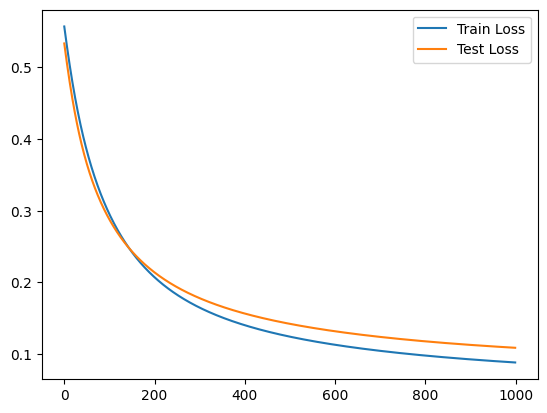

In [ ]:
# Plot the train and test loss per iteration
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate model by accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0)
  acc_train = np.mean(p_train == y_train.numpy())

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  acc_test = np.mean(p_test == y_test.numpy())

  print(f'Train accuracy: {acc_train:.4f}')
  print(f'Test accuracy: {acc_test:.4f}')

Train accuracy: 0.9824
Test accuracy: 0.9649
